# Data Management Project 4 

# Part 1 - Selection 

## Identify your dataset:
### The dataset is 2016 AirBnB listings surveyed every month.  
## Describe your dataset:
### This is information on available listings such as size, location, ratings and price.  This is not transactional data.   
## Data Dictionary:
- room_id: A unique number identifying an Airbnb listing. The listing has a URL on the Airbnb web site of http://airbnb.com/rooms/room_id.
- host_id: A unique number identifying an Airbnb host. The host’s page has a URL on the Airbnb web site of http://airbnb.com/users/show/host_id.
- room_type: One of “Entire home/apt”, “Private room”, or “Shared room”.
- borough: A subregion of the city or search area for which the survey is carried out. The borough is taken from a shapefile of the city that is obtained independently of the Airbnb web site. For some cities, there is no borough information; for others the borough may be a number. If you have better shapefiles for a city of interest, please send them to me.
- neighborhood: As with borough: a subregion of the city or search area for which the survey is carried out. For cities that have both, a neighbourhood is smaller than a borough. For some cities there is no neighbourhood information.
- reviews: The number of reviews that a listing has received. Airbnb has said that 70% of visits end up with a review, so the number of reviews can be used to estimate the number of visits. Note that such an estimate will not be reliable for an individual listing (especially as reviews occasionally vanish from the site), but over a city as a whole it should be a useful metric of traffic.
- overall_satisfaction: The average rating (out of five) that the listing has received from those visitors who left a review.
- accommodates: The number of guests a listing can accommodate.
- bedrooms: The number of bedrooms a listing offers.
- price: The price (in US) for a night stay. In early surveys, there may be some values that were recorded by month.
- minstay: The minimum stay for a visit, as posted by the host.
- latitude and longitude: The latitude and longitude of the listing as posted on the Airbnb site: this may be off by a few hundred metres. I do not have a way to track individual listing locations with
- last_modified: the date and time that the values were read from the Airbnb web site.

## Source:
### The datasets were downloaded from http://tomslee.net/airbnb-data-collection-get-the-data because the data was already scrapped from AirBnB and zipped for each major city.
## What appeals to you about the dataset:
### AirBnB is fascinating because it is a hoteling company that doesn't own any hotels.  It has greatly upset the equilibrium of the lodging industry as Uber has done to the Taxi industry.


In [1]:
!wget -O new_york.zip https://s3.amazonaws.com/tomslee-airbnb-data-2/new_york.zip

--2017-12-08 17:35:06--  https://s3.amazonaws.com/tomslee-airbnb-data-2/new_york.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.226.19
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.226.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145864407 (139M) [binary/octet-stream]
Saving to: ‘new_york.zip’

new_york.zip        100%[===================>] 139.11M  86.8MB/s    in 1.6s    

2017-12-08 17:35:07 (86.8 MB/s) - ‘new_york.zip’ saved [145864407/145864407]



In [2]:
!unzip -o new_york.zip

Archive:  new_york.zip
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0011_2014-05-10.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0049_2014-08-31.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0056_2014-10-17.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0067_2014-12-02.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0100_2015-02-27.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0105_2015-03-14.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0129_2015-08-10.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0152_2015-09-10.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0175_2015-10-13.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0224_2015-12-04.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0249_2015-12-21.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_york_0291_2016-01-21.csv  
 extracting: s3_files/new_york/tomslee_airbnb_new_yor

Let's explore some files.

In [3]:
!head s3_files/new_york/tomslee_airbnb_new_york_0011_2014-05-10.csv

In [4]:
!csvcut -n s3_files/new_york/tomslee_airbnb_new_york_0011_2014-05-10.csv

  1: room_id
  2: host_id
  3: room_type
  4: borough
  5: neighborhood
  6: reviews
  7: overall_satisfaction
  8: accommodates
  9: bedrooms
 10: price
 11: minstay
 12: latitude
 13: longitude
 14: last_modified


The first file has 14 columns.

## Themes and Questions
### Theme
Considering the data consists of surveys taken each month, we decided to investigate seasonal trends of AirBnB listings in New York.
### Questions
The following are the questions we wish to explore
1. How many rooms are listed over time
2. What is the average price over time
3. What are the average satisfaction ratings over times
4. What is the distribution of room types over time

In [5]:
!head s3_files/new_york/tomslee_airbnb_new_york_1438_2017-07-12.csv | csvlook

|-----------+-----------+----------+-------------+---------+----------+-----------+--------------------+---------+----------------------+--------------+----------+-----------+-------+---------+----------------------------------------------------+---------------+----------------------------+-----------+------------+-----------------------------------------------------|
|  room_id  | survey_id | host_id  | room_type   | country | city     | borough   | neighborhood       | reviews | overall_satisfaction | accommodates | bedrooms | bathrooms | price | minstay | name                                               | property_type | last_modified              | latitude  | longitude  | location                                            |
|-----------+-----------+----------+-------------+---------+----------+-----------+--------------------+---------+----------------------+--------------+----------+-----------+-------+---------+----------------------------------------------------+------------

In [6]:
!csvcut -n s3_files/new_york/tomslee_airbnb_new_york_1438_2017-07-12.csv

  1: room_id
  2: survey_id
  3: host_id
  4: room_type
  5: country
  6: city
  7: borough
  8: neighborhood
  9: reviews
 10: overall_satisfaction
 11: accommodates
 12: bedrooms
 13: bathrooms
 14: price
 15: minstay
 16: name
 17: property_type
 18: last_modified
 19: latitude
 20: longitude
 21: location


### Concern - Expansion of data
The last file has 21 columns, which is different from the first one.

In [7]:
!csvstat s3_files/new_york/tomslee_airbnb_new_york_1438_2017-07-12.csv

  1. room_id
	<class 'int'>
	Nulls: False
	Min: 2515
	Max: 19874046
	Sum: 452704240944
	Mean: 10975978.686968118
	Median: 11798782
	Standard Deviation: 6097988.407974921
	Unique values: 41245
  2. survey_id
	<class 'int'>
	Nulls: False
	Values: 1438
  3. host_id
	<class 'int'>
	Nulls: False
	Min: 72
	Max: 140517870
	Sum: 1434350562083
	Mean: 34776350.15354589
	Median: 20292772
	Standard Deviation: 37557547.48864324
	Unique values: 34688
	5 most frequent values:
		417504:	28
		136616915:	18
		81634538:	17
		47554473:	15
		8327019:	14
  4. room_type
	<class 'str'>
	Nulls: False
	Values: Shared room, Private room, Entire home/apt
  5. country
	<class 'NoneType'>
	Nulls: True
	Values: 
  6. city
	<class 'str'>
	Nulls: False
	Values: New York
  7. borough
	<class 'str'>
	Nulls: False
	Values: Staten Island, Queens, Manhattan, Bronx, Brooklyn
  8. neighborhood
	<class 'str'>
	Nulls: False
	Unique values: 234
	5 most frequent values:
		Williamsburg:	3350
		Bedford-Stuyvesant:	2698
		Harlem:	2

### Concern - 2017 Data
We explored each of the rest of the files and found that Airbnb started to put more columns to its datasets from the second half of 2017. We did not show the whole exploring process since it is boring. 
### Key Decision
After some discussion, we decided to include only 2016's data in our analysis. All files came from 2016 have the same number of columns and their format were also the same. We combined those files into a single file call "ny2016.csv".

In [8]:
!csvstack s3_files/new_york/tomslee_airbnb_new_york_*_2016*.csv > ny2016.csv

In [9]:
!ls -lh ny2016.csv

-rw-rw-r-- 1 ubuntu ubuntu 55M Dec  8 17:35 ny2016.csv


In [10]:
!csvstat --count ny2016.csv

Row count: 465178


There are 465,178 rows in ny2016.csv.

In [11]:
!head ny2016.csv

room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
3557831,17911953.0,Private room,Manhattan,East Village,43,4.5,2.0,1.0,115.0,2.0,40.725882,-73.981784,2016-01-24 06:09:52.560406
7780413,4887492.0,Shared room,Manhattan,Tribeca,4,5.0,4.0,1.0,69.0,2.0,40.712191,-74.010212,2016-01-24 06:09:44.958840
1788989,7607092.0,Entire home/apt,Manhattan,SoHo,9,5.0,4.0,1.0,225.0,3.0,40.723919,-73.996525,2016-01-24 06:09:33.672474
9680791,3201897.0,Private room,Brooklyn,Prospect-Lefferts Gardens,1,4.0,2.0,1.0,75.0,3.0,40.65934,-73.960594,2016-01-24 06:09:27.886410
8204392,11268108.0,Private room,Brooklyn,Williamsburg,0,,2.0,1.0,500.0,1.0,40.714678,-73.937739,2016-01-24 06:09:25.858816
7455635,1407021.0,Entire home/apt,Manhattan,Chinatown,11,4.5,2.0,0.0,110.0,2.0,40.716244,-73.990152,2016-01-24 06:08:58.967524
1742471,2127723.0,Entire home/apt,Queens,Sunnyside,17,5.0,2.0,1.0,120.0,3.0,40.746087,-73.914058,2016

In [12]:
!csvcut -n ny2016.csv

  1: room_id
  2: host_id
  3: room_type
  4: borough
  5: neighborhood
  6: reviews
  7: overall_satisfaction
  8: accommodates
  9: bedrooms
 10: price
 11: minstay
 12: latitude
 13: longitude
 14: last_modified


There are 14 columns in this file, just as expected.

In [13]:
!csvstat ny2016.csv

  1. room_id
	<class 'int'>
	Nulls: False
	Min: 105
	Max: 16544971
	Sum: 3443411002687
	Mean: 7402351.36375108
	Median: 7646832.0
	Standard Deviation: 4378088.666306693
	Unique values: 76488
	5 most frequent values:
		7325230:	13
		1525345:	13
		10253315:	13
		7199312:	13
		317905:	13
  2. host_id
	<class 'float'>
	Nulls: True
	Min: 43.0
	Max: 108817370.0
	Sum: 10185059123772.0
	Mean: 21895677.69528531
	Median: 13789963.0
	Standard Deviation: 22378710.640598293
	Unique values: 58359
	5 most frequent values:
		51913826.0:	401
		26377263.0:	341
		417504.0:	323
		25830578.0:	308
		58244317.0:	275
  3. room_type
	<class 'str'>
	Nulls: True
	Values: Private room, Shared room, Entire home/apt
  4. borough
	<class 'str'>
	Nulls: False
	Values: Brooklyn, Manhattan, Staten Island, Bronx, Queens
  5. neighborhood
	<class 'str'>
	Nulls: False
	Unique values: 240
	5 most frequent values:
		Williamsburg:	41317
		Bedford-Stuyvesant:	30145
		Harlem:	27489
		Upper West Side:	22065
		East Village:	2163

### Concern - Data types and Missing Values
However, some columns' data type has changed during the merging process. We need to change the data type of those columns back to what they used to be. Also, some of the columns have missing values. We may need to wrangle the data. 

# Part 2 Data wrangling

We tried to use trifacta wrangler to wrangle data, however, the format of the output from trifacta is not what we wanted. Datatypes were automatically modified and extraneous quotation marks were included and not incompatible with a SQL upload.  Such output causes huge problems when we are trying to build the relational database for analysis. 
### Key Decision:
Rather than using trifacta, we decided to build the relational database and do the cleaning within the data table using sql queries. 

### Create database.

In [1]:
!dropdb -U student ny2016

In [2]:
!createdb -U student ny2016

### Connect database and create the fact table.

In [29]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [30]:
%sql postgresql://student@/ny2016

'Connected: student@ny2016'

In [5]:
%%sql
DROP TABLE IF EXISTS ny2016;

CREATE TABLE ny2016 (
    room_id INTEGER NOT NULL,
    host_id FLOAT,
    room_type VARCHAR(100),
    borough VARCHAR(100) NOT NULL,
    neighborhood VARCHAR(100) NOT NULL,
    reviews INT NOT NULL,
    overall_satisfaction FLOAT,
    accommodates FLOAT,
    bedrooms FLOAT,
    price FLOAT NOT NULL,
    minstay FLOAT,
    latitude FLOAT NOT NULL,
    longitude FLOAT NOT NULL,
    last_modified date
)

Done.
Done.


[]

### Key Decision - 
For the "last_modified" column, since we only want to include date info, we set the data type to "date" in order to exclude information about hours.
### Assumption - 
Listings are not surveyed more than once per day.

The data type of some columns are "float" but we want them to be "int". We will change them later.

### Load data into fact table.

In [6]:
!pwd

/home/ubuntu


*You may need to change the directory base on where you store the ny2016.csv file in your compouter/server*

In [7]:
%%sql
COPY ny2016 from '/home/ubuntu/ny2016.csv'
csv
header;

465178 rows affected.


[]

### Verify 
Done. This number does match the total number of rows in ny2016.csv.

Let's see how does this fact table look like.

In [8]:
%%sql
select *
from ny2016
limit 10

10 rows affected.


room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
3557831,17911953.0,Private room,Manhattan,East Village,43,4.5,2.0,1.0,115.0,2.0,40.725882,-73.981784,2016-01-24
7780413,4887492.0,Shared room,Manhattan,Tribeca,4,5.0,4.0,1.0,69.0,2.0,40.712191,-74.010212,2016-01-24
1788989,7607092.0,Entire home/apt,Manhattan,SoHo,9,5.0,4.0,1.0,225.0,3.0,40.723919,-73.996525,2016-01-24
9680791,3201897.0,Private room,Brooklyn,Prospect-Lefferts Gardens,1,4.0,2.0,1.0,75.0,3.0,40.65934,-73.960594,2016-01-24
8204392,11268108.0,Private room,Brooklyn,Williamsburg,0,None,2.0,1.0,500.0,1.0,40.714678,-73.937739,2016-01-24
7455635,1407021.0,Entire home/apt,Manhattan,Chinatown,11,4.5,2.0,0.0,110.0,2.0,40.716244,-73.990152,2016-01-24
1742471,2127723.0,Entire home/apt,Queens,Sunnyside,17,5.0,2.0,1.0,120.0,3.0,40.746087,-73.914058,2016-01-24
2045660,3652652.0,Private room,Brooklyn,Park Slope,7,4.5,2.0,1.0,55.0,1.0,40.673301,-73.979427,2016-01-24
9603803,23193.0,Private room,Brooklyn,Bedford-Stuyvesant,1,3.0,1.0,1.0,50.0,1.0,40.68777,-73.938698,2016-01-24
3162817,6754169.0,Entire home/apt,Brooklyn,Williamsburg,2,5.0,4.0,2.0,350.0,2.0,40.715725,-73.94058,2016-01-24


### Key Decisions
#### We want to change some column's data type.

In [9]:
%%sql
alter table ny2016
alter column host_id type int

Done.


[]

In [10]:
%%sql
alter table ny2016
alter column accommodates type int

Done.


[]

In [11]:
%%sql
alter table ny2016
alter column bedrooms type int

Done.


[]

In [12]:
%%sql
alter table ny2016
alter column price type int

Done.


[]

In [13]:
%%sql
alter table ny2016
alter column minstay type int

Done.


[]

We changed the float type columns that were supposed to be integer type back to integer type.

Now we want to create some dimension tables.

# ID Table

In [14]:
%%sql
select distinct host_id, room_id
from ny2016
limit 10

10 rows affected.


host_id,room_id
92505537,15291113
4440458,15145167
453242,4573354
65476654,12184165
7259476,3880863
16378016,7403320
13010114,12838731
385909,8127515
63202581,11888026
44260966,8402207


In [15]:
%%sql
drop table if exists ID;

create table ID (
    ID_key serial primary key,
    room_id int,
    host_id int
);

Done.
Done.


[]

In [16]:
%%sql 
insert into ID (room_id, host_id)
select distinct room_id, host_id
from ny2016;

76532 rows affected.


[]

In [17]:
%%sql
select * from ID
limit 20

20 rows affected.


id_key,room_id,host_id
1,8704528,45694156
2,12607341,319506
3,15661869,101114282
4,1190567,4124346
5,7319492,25407356
6,2560559,2766490
7,16220917,105983588
8,6200613,10418386
9,14162899,81291914
10,14167784,26505587


After creating this ID table, we need to add foreign key constraint to reference it back to fact table. 

In [18]:
%%sql
alter table ny2016
add column ID_key integer,
add constraint fk_ID_key
    foreign key (ID_key)
    references ID (ID_key);

Done.


[]

Done. Let's check the id_key in fact table.

In [19]:
%%sql
select ID_key from ny2016
limit 10;

10 rows affected.


id_key
None
None
None
None
None
None
None
None
None
None


### Challenge 
We saw nulls in the id_key columns in fact table. Since there are nulls in columns, as we found before, problem arise when loading the key in dimension table to fact table.

### We can solve this problem by setting nulls in ID table to 'N/A'.

%%sql
update ID
set room_id = "empty"
where room_id is null;

%%sql 
update ID
set host_id = 'N/A'
where host_id is null;

### Then replace nulls in fact table ny2016 to 'N/A'.

%%sql
update ny2016
set room_id = 'N/A'
where room_id is null;

%%sql 
update ny2016
set host_id = 'N/A'
where host_id is null;

### Key Decision
#### But we chose to take the following steps.

In [20]:
%%sql
DROP INDEX IF EXISTS idx_ID;

CREATE INDEX idx_ID ON ID (room_id, host_id);

Done.
Done.


[]

In [31]:
%%sql
update ny2016
set ID_key = ID.ID_key
from ID
where (ny2016.room_id = ID.room_id
        or (ny2016.room_id is null and ID.room_id is null))
    and (ny2016.host_id = ID.host_id
        or (ny2016.host_id is null and ID.host_id is null))

465178 rows affected.


[]

### Verify
Done. This number matches the total number of rows in the fact table.

In [32]:
%%sql
SELECT ID_key FROM ny2016
LIMIT 10;

10 rows affected.


id_key
16797
15602
37824
20791
35179
69716
21768
19101
58098
51824


Successful.

# Room Table

In [37]:
%%sql
DROP TABLE IF EXISTS room;

CREATE TABLE room (
    room_key SERIAL PRIMARY KEY,
    room_type VARCHAR(100),
    accommodates FLOAT,
    bedrooms FLOAT,
    minstay FLOAT
);

Done.
Done.


[]

In [38]:
%%sql
SELECT * FROM room

0 rows affected.


room_key,room_type,accommodates,bedrooms,minstay


In [39]:
%%sql
INSERT INTO room (room_type, accommodates,bedrooms,minstay)
SELECT DISTINCT room_type, accommodates,bedrooms,minstay
FROM ny2016;

1672 rows affected.


[]

In [43]:
%%sql
ALTER TABLE ny2016
ADD COLUMN room_key INTEGER,
ADD CONSTRAINT fk_room_key
    FOREIGN KEY (room_key)
    REFERENCES room (room_key);

Done.


[]

In [44]:
%%sql
DROP INDEX IF EXISTS idx_room;

CREATE INDEX idx_room ON room (room_type, accommodates,bedrooms,minstay);

Done.
Done.


[]

In [46]:
%%sql
UPDATE ny2016
SET room_key = room.room_key
FROM room
WHERE (ny2016.room_type = room.room_type 
        OR ( ny2016.room_type IS NULL AND room.room_type IS NULL))
    AND (ny2016.accommodates = room.accommodates 
        OR ( ny2016.accommodates IS NULL AND room.accommodates IS NULL))
    AND (ny2016.bedrooms = room.bedrooms 
        OR ( ny2016.bedrooms IS NULL AND room.bedrooms IS NULL))
    AND (ny2016.minstay = room.minstay 
        OR ( ny2016.minstay IS NULL AND room.minstay IS NULL))

465178 rows affected.


[]

### Verify
Done. This number matches the total number of rows in the fact table.

In [47]:
%%sql
SELECT room_key FROM ny2016
LIMIT 10;

10 rows affected.


room_key
490
1446
1446
1446
1446
1376
1619
682
1252
748


Successful.

# Location Table

In [48]:
%%sql
DROP TABLE IF EXISTS locations;

CREATE TABLE locations (
    locations_key SERIAL PRIMARY KEY,
    borough VARCHAR(100) NOT NULL,
    neighborhood VARCHAR(100) NOT NULL
);

Done.
Done.


[]

In [49]:
%%sql
SELECT * FROM locations

0 rows affected.


locations_key,borough,neighborhood


In [50]:
%%sql
INSERT INTO locations (borough, neighborhood)
SELECT DISTINCT borough, neighborhood
FROM ny2016;

240 rows affected.


[]

In [51]:
%%sql
ALTER TABLE ny2016
ADD COLUMN locations_key INTEGER,
ADD CONSTRAINT fk_locations_key
    FOREIGN KEY (locations_key)
    REFERENCES locations (locations_key);

Done.


[]

In [52]:
%%sql
DROP INDEX IF EXISTS idx_locations;

CREATE INDEX idx_locations ON locations (borough, neighborhood);

Done.
Done.


[]

In [53]:
%%sql
UPDATE ny2016
SET locations_key = locations.locations_key
FROM locations
WHERE (ny2016.borough = locations.borough 
        OR ( ny2016.borough IS NULL AND locations.borough IS NULL))
    AND (ny2016.neighborhood = locations.neighborhood 
        OR ( ny2016.neighborhood IS NULL AND locations.neighborhood IS NULL))

465178 rows affected.


[]

### Verify 
Done.

In [54]:
%%sql
SELECT * FROM locations
LIMIT 10;

10 rows affected.


locations_key,borough,neighborhood
1,Brooklyn,Gravesend
2,Queens,East Elmhurst
3,Bronx,Mott Haven
4,Queens,South Ozone Park
5,Brooklyn,Downtown Brooklyn
6,Bronx,Longwood
7,Brooklyn,Manhattan Beach
8,Bronx,Morris Heights
9,Bronx,Bronxdale
10,Queens,Howard Beach


Successful.

### Key Decision
Since we don't care the details of latitude and logitude, we don't put them in the location dimension table and we drop them from the fact table ny2016.

Now we can check the fact table and drop columns that are not key or useful facts.

In [55]:
%%sql
select * from ny2016
limit 3

3 rows affected.


room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified,id_key,room_key,locations_key
9150194,22489244,Private room,Brooklyn,Williamsburg,4,5.0,2,1,69,2,40.704797,-73.942935,2016-04-23,26173,1446,20
8406689,11395111,Private room,Brooklyn,Bedford-Stuyvesant,6,4.5,2,1,65,2,40.692472,-73.938746,2016-09-20,41578,1446,36
9349327,22409286,Entire home/apt,Manhattan,Chelsea,1,None,3,0,150,4,40.739354,-74.000063,2016-09-20,62850,1038,32


In [56]:
%%sql 
ALTER TABLE ny2016
DROP COLUMN room_id,
DROP COLUMN host_id,
DROP COLUMN room_type,
DROP COLUMN borough,
DROP COLUMN neighborhood,
DROP COLUMN accommodates,
DROP COLUMN bedrooms,
DROP COLUMN minstay,
DROP COLUMN latitude,
DROP COLUMN longitude;

Done.


[]

### Verify

In [57]:
%%sql
select * from ny2016
limit 10;

10 rows affected.


reviews,overall_satisfaction,price,last_modified,id_key,room_key,locations_key
4,5.0,69,2016-04-23,26173,1446,20
6,4.5,65,2016-09-20,41578,1446,36
1,None,150,2016-09-20,62850,1038,32
17,5.0,80,2016-09-20,41800,490,52
1,None,70,2016-09-20,65402,490,36
21,4.5,80,2016-09-20,15783,490,194
44,4.5,100,2016-09-20,25293,490,95
1,None,137,2016-09-20,315,1219,20
1,None,110,2016-09-20,33869,334,90
93,4.5,150,2016-09-20,71953,1529,116


This fact table contains keys that reference to other dimension tables and facts such as price and reviews as well as degenerate dimension (overall_satisfaction).

# Part 3 - Analysis

In [58]:
import matplotlib.pyplot as plt
import pandas.io.sql as pdsql
import psycopg2
import pandas as pd
import numpy as np

## Number of rooms listed overtime by month:

In [59]:
%%sql
select count(distinct room_id) as Num_Of_Room_Listed, to_char(last_modified, 'MM') AS MONTH
from ID
join ny2016 on ID.ID_key = ny2016.ID_key
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


num_of_room_listed,month
36003,01
24210,02
35766,03
38107,04
35067,05
34205,06
35547,07
37769,08
35620,09
35795,10


In [60]:
conn = psycopg2.connect("dbname='ny2016' user='student' host='localhost' password=''")

In [61]:
num_room = pd.read_sql('''select count(distinct room_id) as Num_Of_Room_Listed, to_char(last_modified, 'MM') AS MONTH 
from ID join ny2016 on ID.ID_key = ny2016.ID_key 
group by to_char(last_modified, 'MM') 
order by to_char(last_modified, 'MM')''',conn)

In [62]:
num_of_room_listed =num_room['num_of_room_listed'].values
month = num_room['month'].values

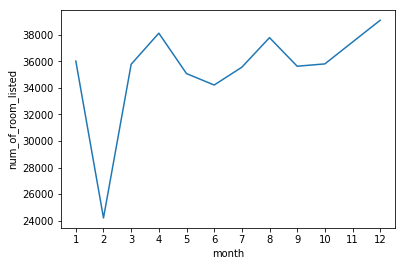

In [63]:
plt.plot(month,num_of_room_listed)
plt.xlabel('month')
plt.ylabel('num_of_room_listed')
plt.xticks(np.arange(1, 13, 1.0))
plt.show()  

In [64]:
del num_room

### Answer and Discussion
We can see there is a sharp decrease of rooms listed from January to February.  This could be an indicator of either low demand, less people travel to New York in February, or low supply, more New Yorkers stay home in February and can't list their AirBnB.

## NUMBER OF HOST OVER TIME:

In [65]:
%%sql
select count(distinct host_id) as num_of_host, to_char(last_modified, 'MM') AS MONTH
from ID
join ny2016 on ID.ID_key = ny2016.ID_key
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


num_of_host,month
29180,01
20701,02
29427,03
31451,04
29199,05
28568,06
29757,07
31451,08
29934,09
29783,10


In [66]:
num_host = pd.read_sql('''select count(distinct host_id) as num_of_host, to_char(last_modified, 'MM') AS MONTH
from ID
join ny2016 on ID.ID_key = ny2016.ID_key
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM');''',conn)

In [67]:
num_of_host =num_host['num_of_host'].values

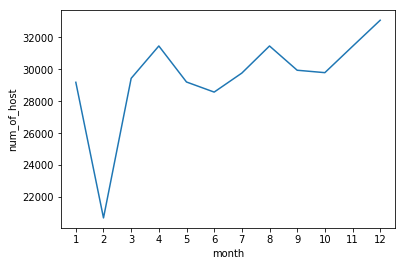

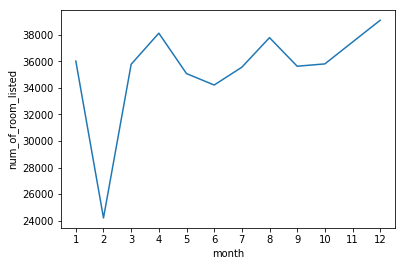

In [68]:
plt.plot(month,num_of_host)
plt.xticks(np.arange(1, 13, 1.0))
plt.xlabel('month')
plt.ylabel('num_of_host')
plt.show()  




plt.plot(month,num_of_room_listed)
plt.xlabel('month')
plt.ylabel('num_of_room_listed')
plt.xticks(np.arange(1, 13, 1.0))
plt.show()  

### Answer and Discussion
It appears the seasonal trends for Room and host are highly similar.

## Change in distribution of room type over time:

In [69]:
%%sql
select room_type, count(room.room_key),
    to_char(last_modified, 'MM') as month
from room
join ny2016 on room.room_key = ny2016.room_key
where room.room_type is not null
group by to_char(last_modified, 'MM'), room.room_type
order by to_char(last_modified, 'MM')

36 rows affected.


room_type,count,month
Private room,15371,01
Shared room,1057,01
Entire home/apt,19560,01
Entire home/apt,12989,02
Private room,10566,02
Shared room,655,02
Shared room,1355,03
Private room,19803,03
Entire home/apt,24245,03
Shared room,2139,04


In [70]:
Entire_home_apt = pd.read_sql('''select count(room.room_key) as entire_home_apt,
    to_char(last_modified, 'MM') as month
from room
join ny2016 on room.room_key = ny2016.room_key
where room.room_type = 'Entire home/apt'
group by to_char(last_modified, 'MM'), room.room_type
order by to_char(last_modified, 'MM')''',conn)
Entire_home_apt

,entire_home_apt,month
0,19560,01
1,12989,02
2,24245,03
3,35545,04
4,18170,05
5,17226,06
6,17773,07
7,18963,08
8,18500,09
9,17639,10


In [71]:
Private_room = pd.read_sql('''select  count(room.room_key) as private_room,
    to_char(last_modified, 'MM') as month
from room
join ny2016 on room.room_key = ny2016.room_key
where room.room_type = 'Private room'
group by to_char(last_modified, 'MM'), room.room_type
order by to_char(last_modified, 'MM')''',conn)
Private_room

,private_room,month
0,15371,01
1,10566,02
2,19803,03
3,31357,04
4,15853,05
5,15892,06
6,16554,07
7,17530,08
8,16497,09
9,16824,10


In [72]:
Shared_room = pd.read_sql('''select  count(room.room_key) as shared_room,
    to_char(last_modified, 'MM') as month
from room
join ny2016 on room.room_key = ny2016.room_key
where room.room_type = 'Shared room'
group by to_char(last_modified, 'MM'), room.room_type
order by to_char(last_modified, 'MM')''',conn)
Shared_room

,shared_room,month
0,1057,01
1,655,02
2,1355,03
3,2139,04
4,1044,05
5,1087,06
6,1220,07
7,1276,08
8,623,09
9,1332,10


In [73]:
Entire_home_apt =Entire_home_apt['entire_home_apt'].values

In [74]:
Private_room =Private_room['private_room'].values

In [75]:
Shared_room =Shared_room['shared_room'].values

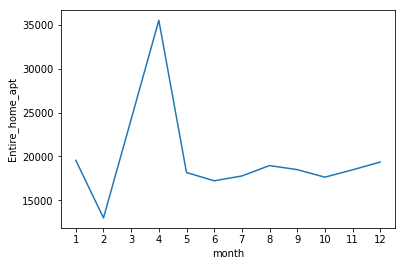

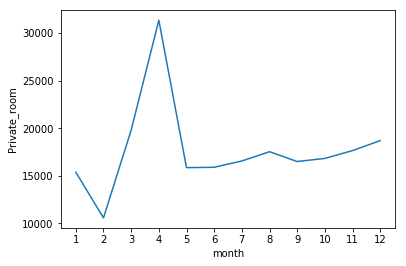

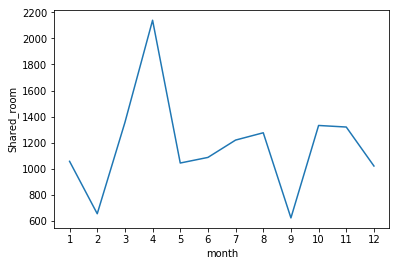

In [76]:
plt.plot(month,Entire_home_apt)
plt.xticks(np.arange(1, 13, 1.0))
plt.xlabel('month')
plt.ylabel('Entire_home_apt')
plt.show()  

plt.plot(month,Private_room)
plt.xticks(np.arange(1, 13, 1.0))
plt.xlabel('month')
plt.ylabel('Private_room')
plt.show()  

plt.plot(month,Shared_room)
plt.xticks(np.arange(1, 13, 1.0))
plt.xlabel('month')
plt.ylabel('Shared_room')
plt.show()  


In [77]:
del Entire_home_apt, Private_room,Shared_room

### Answer and Discussion
We can see similar trends from all three types of rooms in the first two quarters. However, in the third and four quarter, shared room is much different from the rest.
Specifically, there is a sharp decline in share room listings in September.  Perhaps college students are renting a vast majority of the rooms listed in August causing low supply in September prior to the start of the college semester.  Room shares are popular among the young students or young professionals.

###  Change in average price over time in manhattan:

In [78]:
%%sql
select avg(price), 
    to_char(last_modified, 'MM') as month
from ny2016
join locations on ny2016.locations_key = locations.locations_key
where locations.borough = 'Manhattan'
and ny2016.price is not null 
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg,month
182.0146008739209208,01
179.0566309390497520,02
181.5902726920260199,03
181.4297644602581821,04
181.6826187717265353,05
178.8792870313460356,06
176.7736073167834660,07
180.7274648278930101,08
186.2068697265274370,09
184.7431253785584494,10


In [80]:
Avg_price = pd.read_sql('''select avg(price) as avg_price, 
    to_char(last_modified, 'MM') as month
from ny2016
join locations on ny2016.locations_key = locations.locations_key
where locations.borough = 'Manhattan'
and ny2016.price is not null 
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM');''',conn)
Avg_price

,avg_price,month
0,182.014601,01
1,179.056631,02
2,181.590273,03
3,181.429764,04
4,181.682619,05
5,178.879287,06
6,176.773607,07
7,180.727465,08
8,186.206870,09
9,184.743125,10


In [81]:
Avg_price =Avg_price['avg_price'].values

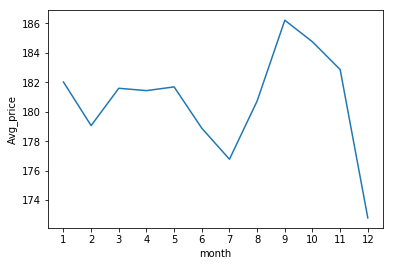

In [82]:
plt.plot(month,Avg_price)
plt.xticks(np.arange(1, 13, 1.0))
plt.xlabel('month')
plt.ylabel('Avg_price')
plt.show()  

In [83]:
del Avg_price

### Answer and Discussion
We can see sharp decrease in average listing price in December.  This is not what we expected.  This may be related to the holiday season.  Prices drop to maintain competitive pricing among the high demand during the holiday season to travel to New York.

### Change in overall satisfaction of different room type over time:

In [84]:
%%sql
select avg(overall_satisfaction),
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where ny2016.overall_satisfaction is not null
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg,month
4.63785020649626,01
4.64471707561342,02
4.64875872188782,03
4.6548205080574,04
4.65492402334508,05
4.64923830250272,06
4.64792169623176,07
4.64703718238006,08
4.65676274944568,09
4.6533834228922,10


### Answer
We found sharp decrease in average satisfaction in December, we tried to see if the trend is the same in reviews for different type of rooms.

In [85]:
%%sql
select avg(overall_satisfaction), room.room_type,
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where room.room_type = 'Entire home/apt'
and ny2016.overall_satisfaction is not null
group by room.room_type, to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg,room_type,month
4.66721909181306,Entire home/apt,01
4.67482028753994,Entire home/apt,02
4.67884532296392,Entire home/apt,03
4.68411330049261,Entire home/apt,04
4.68144018144018,Entire home/apt,05
4.67457507082153,Entire home/apt,06
4.6714799688837,Entire home/apt,07
4.67347582972583,Entire home/apt,08
4.67819220130276,Entire home/apt,09
4.67549759156594,Entire home/apt,10


In [86]:
%%sql
select avg(overall_satisfaction), room.room_type,
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where room.room_type = 'Private room'
and ny2016.overall_satisfaction is not null
group by room.room_type, to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg,room_type,month
4.5998728890503,Private room,01
4.60546038543897,Private room,02
4.6113383566559,Private room,03
4.62063291833489,Private room,04
4.62412742733849,Private room,05
4.6212389380531,Private room,06
4.62314120683298,Private room,07
4.62035112035112,Private room,08
4.6338876146789,Private room,09
4.63583846236907,Private room,10


In [87]:
%%sql
select avg(overall_satisfaction),room.room_type,
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where room.room_type = 'Shared room'
and ny2016.overall_satisfaction is not null
group by room.room_type,to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg,room_type,month
4.60419397116645,Shared room,01
4.62783505154639,Shared room,02
4.61093418259023,Shared room,03
4.60311284046693,Shared room,04
4.58691756272401,Shared room,05
4.59982935153584,Shared room,06
4.58372827804107,Shared room,07
4.55,Shared room,08
4.54619565217391,Shared room,09
4.54771241830065,Shared room,10


### Answer and Discussion
All different room types shared the same trend with the average customer satisfaction rating about 2.5 where the rating is around 4.5 for the rest of the year.  Again, this was not expected and more shocking than the pricing trend.  We want to find out the reason behind such finding. Since we know that there are nulls in satisfaction ratings, we don't know are there any nulls in rating for December. Let's test it.

In [88]:
%%sql
select overall_satisfaction
from ny2016
join room on ny2016.room_key = room.room_key
where ny2016.overall_satisfaction is null
and to_char(last_modified, 'MM') = '12'
limit 10


0 rows affected.


overall_satisfaction


Seem like there is no null value in December's ratings.

In [89]:
%%sql
select avg(overall_satisfaction),
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where room.room_type = 'Shared room'
and ny2016.overall_satisfaction is not null
and to_char(last_modified, 'MM') = '12'
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

1 rows affected.


avg,month
2.48090107737512,12


We take into account the nulls in the query and it doesn't affect the result. The result is the same as we saw before. Although there is no null value in overall_satisfaction, it is possible that the nulls were replace by "0". Let's test that assumption. 

In [90]:
%%sql
select count(overall_satisfaction)
from ny2016
join room on ny2016.room_key = room.room_key
where ny2016.overall_satisfaction = '0'
and to_char(last_modified, 'MM') = '12'

1 rows affected.


count
16857


There were 16,857 zero star ratings in December

In [91]:
%%sql
select avg(overall_satisfaction),
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where room.room_type = 'Shared room'
and ny2016.overall_satisfaction != '0'
and to_char(last_modified, 'MM') = '12'
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

1 rows affected.


avg,month
4.64770642201835,12


After we exclude 0 star ratings, the result seems to be more reliable.

### Significant Finding
The reason that we saw a sharp decrease in overall_satisfactin is that there are a lot of 0 star reviews in the review from December. However, the worst rating in Airbnb is 1 star, so these "0" mean no review was left. We have to exclude every 0 from the selection, not only from December, but also from other months. 

In [92]:
%%sql
select avg(overall_satisfaction),room.room_type,
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where room.room_type = 'Entire home/apt'
and ny2016.overall_satisfaction != '0'
group by room.room_type, to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg,room_type,month
4.66721909181306,Entire home/apt,01
4.67482028753994,Entire home/apt,02
4.67884532296392,Entire home/apt,03
4.68411330049261,Entire home/apt,04
4.68144018144018,Entire home/apt,05
4.67457507082153,Entire home/apt,06
4.6714799688837,Entire home/apt,07
4.67347582972583,Entire home/apt,08
4.67819220130276,Entire home/apt,09
4.67549759156594,Entire home/apt,10


In [93]:
%%sql
select avg(overall_satisfaction),room.room_type,
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where room.room_type = 'Private room'
and ny2016.overall_satisfaction != '0'
group by room.room_type,to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg,room_type,month
4.5998728890503,Private room,01
4.60546038543897,Private room,02
4.6113383566559,Private room,03
4.62063291833489,Private room,04
4.62412742733849,Private room,05
4.6212389380531,Private room,06
4.62314120683298,Private room,07
4.62035112035112,Private room,08
4.6338876146789,Private room,09
4.63583846236907,Private room,10


In [94]:
%%sql
select avg(overall_satisfaction),room.room_type,
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where room.room_type = 'Shared room'
and ny2016.overall_satisfaction != '0'
group by room.room_type,to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg,room_type,month
4.60419397116645,Shared room,01
4.62783505154639,Shared room,02
4.61093418259023,Shared room,03
4.60311284046693,Shared room,04
4.58691756272401,Shared room,05
4.59982935153584,Shared room,06
4.58372827804107,Shared room,07
4.55,Shared room,08
4.54619565217391,Shared room,09
4.54771241830065,Shared room,10


These results looks about right.

In [95]:
%%sql
select avg(overall_satisfaction) as avg_satisfaction,
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where ny2016.overall_satisfaction is not null
and ny2016.overall_satisfaction != '0'
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg_satisfaction,month
4.63785020649626,01
4.64471707561342,02
4.64875872188782,03
4.6548205080574,04
4.65492402334508,05
4.64923830250272,06
4.64792169623176,07
4.64703718238006,08
4.65676274944568,09
4.6533834228922,10


In [96]:
Avg_satisfaction = pd.read_sql('''select avg(overall_satisfaction) as avg_satisfaction,
    to_char(last_modified, 'MM') as month
from ny2016
join room on ny2016.room_key = room.room_key
where ny2016.overall_satisfaction is not null
and ny2016.overall_satisfaction != '0'
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM');''',conn)
Avg_satisfaction

,avg_satisfaction,month
0,4.637850,01
1,4.644717,02
2,4.648759,03
3,4.654821,04
4,4.654924,05
5,4.649238,06
6,4.647922,07
7,4.647037,08
8,4.656763,09
9,4.653383,10


In [97]:
Avg_satisfaction=Avg_satisfaction['avg_satisfaction'].values

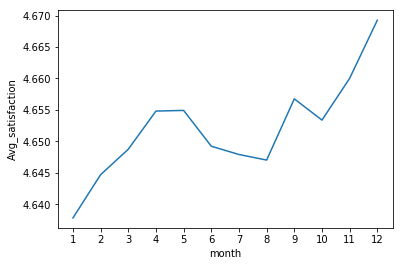

In [98]:
plt.plot(month,Avg_satisfaction)
plt.xticks(np.arange(1, 13, 1.0))
plt.xlabel('month')
plt.ylabel('Avg_satisfaction')
plt.show() 

In [99]:
del Avg_satisfaction

### Answer and Discussion
We now see a more consistent upward trend in satisfaction ratings.  The apparent spike in December could be due to winter tourists giving generous ratings in the spirit of the holidays.


### Revisit, Reanalyze Price with new discovery:
Since we found that null can be replaced by "0" when the data was recorded and we saw a sharp decrease in listing price for December, we need to check if this is also the case.

In [100]:
%%sql
select avg(price), 
    to_char(last_modified, 'MM') as month
from ny2016
join locations on ny2016.locations_key = locations.locations_key
where locations.borough = 'Manhattan'
and ny2016.price is not null
and ny2016.price != '0'
group by to_char(last_modified, 'MM')
order by to_char(last_modified, 'MM')

12 rows affected.


avg,month
182.0146008739209208,01
179.0566309390497520,02
181.5902726920260199,03
181.4297644602581821,04
181.6826187717265353,05
178.8792870313460356,06
176.7736073167834660,07
180.7274648278930101,08
186.2068697265274370,09
184.7431253785584494,10


The number still doesn't change. Thus, this number and trend should be reliable.

# Bonus 

We chose the dataset of Housing complaints in NYC in 2016 from NYC open data. We are trying to figure out the relationship between average satisfaction of Airbnb and number of complaints for NYC housing.

In [108]:
!csvstat --count Complaint2016.csv

Row count: 579440


In [109]:
!head Complaint2016.csv

ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID ,SpaceType,TypeID,Type,MajorCategoryID,MajorCategory,MinorCategoryID,MinorCategory,CodeID,Code,StatusID,Status,StatusDate,StatusDescription
16079447,7768889,91,APARTMENT,541,BATHROOM,1,EMERGENCY,9,PLUMBING,66,TOILET,631,BOWL LOOSE OR WOBBLY,2,CLOSE,01/01/2016,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16085204,7771797,91,APARTMENT,543,ENTIRE APARTMENT,1,EMERGENCY,59,HEAT/HOT WATER,348,APARTMENT ONLY,2713,NO HEAT,2,CLOSE,01/01/2016,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16079529,7768944,91,APARTMENT,547,LIVING ROOM,1,EMERGENCY,9,PL

In [103]:
!csvcut -n Complaint2016.csv

  1: ProblemID
  2: ComplaintID
  3: UnitTypeID
  4: UnitType
  5: SpaceTypeID 
  6: SpaceType
  7: TypeID
  8: Type
  9: MajorCategoryID
 10: MajorCategory
 11: MinorCategoryID
 12: MinorCategory
 13: CodeID
 14: Code
 15: StatusID
 16: Status
 17: StatusDate
 18: StatusDescription


In [104]:
!head -n 1000 Complaint2016.csv | csvstat

  1. ProblemID
	<class 'int'>
	Nulls: False
	Min: 15667333
	Max: 16172790
	Sum: 16086629215
	Mean: 16102731.946946947
	Median: 16116368
	Standard Deviation: 66846.40884776108
	Unique values: 999
  2. ComplaintID
	<class 'int'>
	Nulls: False
	Min: 7542800
	Max: 7826744
	Sum: 7776463295
	Mean: 7784247.542542542
	Median: 7792010
	Standard Deviation: 38635.63695238713
	Unique values: 695
	5 most frequent values:
		7810672:	9
		7790361:	8
		7775953:	8
		7708107:	8
		7804366:	7
  3. UnitTypeID
	<class 'int'>
	Nulls: False
	Values: 91, 20, 93, 92
  4. UnitType
	<class 'str'>
	Nulls: False
	Values: APARTMENT, BUILDING-W, PUBLIC ARE
  5. SpaceTypeID 
	<class 'int'>
	Nulls: False
	Min: 68
	Max: 577
	Sum: 538412
	Mean: 538.950950950951
	Median: 543
	Standard Deviation: 54.34382990225286
	Unique values: 23
	5 most frequent values:
		543:	414
		541:	149
		550:	126
		546:	78
		542:	75
  6. SpaceType
	<class 'str'>
	Nulls: False
	Unique values: 20
	5 most frequent values:
		ENTIRE APARTMENT:	427
		BA

In [110]:
%%sql
DROP TABLE IF EXISTS complaint2016;

CREATE TABLE complaint2016 (
    ProblemID INTEGER NOT NULL,
    ComplaintID INTEGER NOT NULL,
    UnitTypeID INTEGER NOT NULL,
    UnitType VARCHAR(20),
    SpaceTypeID INTEGER,
    SpaceType VARCHAR(50),
    TypeID INTEGER,
    Type VARCHAR(20),
    MajorCategoryID INTEGER,
    MajorCategory VARCHAR(50),
    MinorCategoryID INTEGER,
    MinorCategory VARCHAR(50),
    CodeID INTEGER,
    Code VARCHAR(100),
    StatusID INTEGER,
    Status VARCHAR(20),
    StatusDate date,
    StatusDescription VARCHAR(1000)
)

Done.
Done.


[]

In [111]:
%%sql
COPY complaint2016 from '/home/ubuntu/Complaint2016.csv'
csv
header;

579440 rows affected.


[]

In [112]:
%%sql
select *
from complaint2016
limit 10

10 rows affected.


problemid,complaintid,unittypeid,unittype,spacetypeid,spacetype,typeid,type,majorcategoryid,majorcategory,minorcategoryid,minorcategory,codeid,code,statusid,status,statusdate,statusdescription
16079447,7768889,91,APARTMENT,541,BATHROOM,1,EMERGENCY,9,PLUMBING,66,TOILET,631,BOWL LOOSE OR WOBBLY,2,CLOSE,2016-01-01,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16085204,7771797,91,APARTMENT,543,ENTIRE APARTMENT,1,EMERGENCY,59,HEAT/HOT WATER,348,APARTMENT ONLY,2713,NO HEAT,2,CLOSE,2016-01-01,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16079529,7768944,91,APARTMENT,547,LIVING ROOM,1,EMERGENCY,9,PLUMBING,287,RADIATOR,2790,BROKEN OR MISSING,2,CLOSE,2016-01-01,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16078489,7768468,91,APARTMENT,543,ENTIRE APARTMENT,1,EMERGENCY,59,HEAT/HOT WATER,348,APARTMENT ONLY,2713,NO HEAT,2,CLOSE,2016-01-01,"More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16077583,7768023,92,BUILDING-W,550,BUILDING-WIDE,1,EMERGENCY,59,HEAT/HOT WATER,349,ENTIRE BUILDING,2716,NO HEAT AND NO HOT WATER,2,CLOSE,2016-01-02,"More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted a tenant in the building and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16073589,7765800,20,APARTMENT,68,ENTIRE APARTMENT,1,EMERGENCY,59,HEAT/HOT WATER,349,ENTIRE BUILDING,2716,NO HEAT AND NO HOT WATER,2,CLOSE,2016-01-02,"More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16072388,7765140,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,63,UNSANITARY CONDITION,376,PESTS,2821,MICE,2,CLOSE,2016-01-02,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16071405,7764563,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,56,DOOR/WINDOW,337,WINDOW FRAME,2671,LOCK BROKEN OR MISSING,2,CLOSE,2016-01-02,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16071404,7764563,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,63,UNSANITARY CONDITION,376,PESTS,2821,MICE,2,CLOSE,2016-01-02,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
16074624,7766343,91,

In [113]:
%%sql 
ALTER TABLE complaint2016
DROP COLUMN StatusDescription

Done.


[]

In [114]:
%%sql
select *
from complaint2016
limit 10

10 rows affected.


problemid,complaintid,unittypeid,unittype,spacetypeid,spacetype,typeid,type,majorcategoryid,majorcategory,minorcategoryid,minorcategory,codeid,code,statusid,status,statusdate
16079447,7768889,91,APARTMENT,541,BATHROOM,1,EMERGENCY,9,PLUMBING,66,TOILET,631,BOWL LOOSE OR WOBBLY,2,CLOSE,2016-01-01
16085204,7771797,91,APARTMENT,543,ENTIRE APARTMENT,1,EMERGENCY,59,HEAT/HOT WATER,348,APARTMENT ONLY,2713,NO HEAT,2,CLOSE,2016-01-01
16079529,7768944,91,APARTMENT,547,LIVING ROOM,1,EMERGENCY,9,PLUMBING,287,RADIATOR,2790,BROKEN OR MISSING,2,CLOSE,2016-01-01
16078489,7768468,91,APARTMENT,543,ENTIRE APARTMENT,1,EMERGENCY,59,HEAT/HOT WATER,348,APARTMENT ONLY,2713,NO HEAT,2,CLOSE,2016-01-01
16077583,7768023,92,BUILDING-W,550,BUILDING-WIDE,1,EMERGENCY,59,HEAT/HOT WATER,349,ENTIRE BUILDING,2716,NO HEAT AND NO HOT WATER,2,CLOSE,2016-01-02
16073589,7765800,20,APARTMENT,68,ENTIRE APARTMENT,1,EMERGENCY,59,HEAT/HOT WATER,349,ENTIRE BUILDING,2716,NO HEAT AND NO HOT WATER,2,CLOSE,2016-01-02
16072388,7765140,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,63,UNSANITARY CONDITION,376,PESTS,2821,MICE,2,CLOSE,2016-01-02
16071405,7764563,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,56,DOOR/WINDOW,337,WINDOW FRAME,2671,LOCK BROKEN OR MISSING,2,CLOSE,2016-01-02
16071404,7764563,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,63,UNSANITARY CONDITION,376,PESTS,2821,MICE,2,CLOSE,2016-01-02
16074624,7766343,91,APARTMENT,543,ENTIRE APARTMENT,3,NON EMERGENCY,63,UNSANITARY CONDITION,376,PESTS,2823,ROACHES,2,CLOSE,2016-01-02


In [115]:
%%sql
select count(*) AS num_of_complaint, to_char(StatusDate, 'MM') as month
from complaint2016
group by to_char(StatusDate, 'MM')
order by to_char(StatusDate, 'MM')

12 rows affected.


num_of_complaint,month
3222,01
77951,02
69506,03
47936,04
39909,05
36862,06
36866,07
42976,08
39796,09
53082,10


In [116]:
complaint = pd.read_sql('''select count(*) AS num_of_complaint, to_char(StatusDate, 'MM') as month
from complaint2016
group by to_char(StatusDate, 'MM')
order by to_char(StatusDate, 'MM')''',conn)

In [117]:
num_of_complaint =complaint['num_of_complaint'].values
month = complaint['month'].values

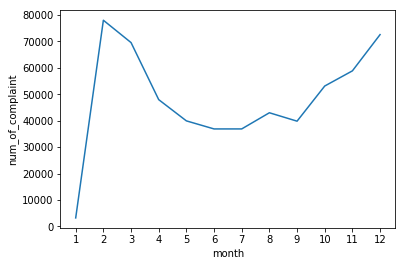

In [118]:
plt.plot(month,num_of_complaint)
plt.xlabel('month')
plt.ylabel('num_of_complaint')
plt.xticks(np.arange(1, 13, 1.0))
plt.show()  

We can see from the plot that the number of complaints seem to not have an obvious relation with the average satisfaction of Airbnb.

We also used the data of Dow Jones Industrial Average in 2016. We want to see whether there is a relation between the DJIA and the average price of Airbnb listings

In [119]:
!csvstat DJIA2016.csv

  1. DATE
	<class 'datetime.date'>
	Nulls: False
	Min: 2016-01-04
	Max: 2016-12-30
	Unique values: 260
  2. DJIA
	<class 'int'>
	Nulls: True
	Min: 17737
	Max: 1997462
	Sum: 404488274
	Mean: 1605112.1984126985
	Median: 1788972.0
	Standard Deviation: 526024.58251294
	Unique values: 251
	5 most frequent values:
		1853305:	2
		1858969:	1
		1847217:	1
		1615141:	1
		180864:	1

Row count: 260


In [120]:
%%sql
DROP TABLE IF EXISTS DJIA2016;

CREATE TABLE DJIA2016 (
    DATE date,
    DJIA integer
)

Done.
Done.


[]

In [121]:
%%sql
COPY DJIA2016 from '/home/ubuntu/DJIA2016.csv'
csv
header;

260 rows affected.


[]

In [122]:
%%sql
SELECT * FROM DJIA2016
LIMIT 10;

10 rows affected.


date,djia
2016-01-04,1714894
2016-01-05,1715866
2016-01-06,1690651
2016-01-07,165141
2016-01-08,1634645
2016-01-11,1639857
2016-01-12,1651622
2016-01-13,1615141
2016-01-14,1637905
2016-01-15,1598808


In [123]:
%%sql
SELECT AVG(DJIA) AS avg_DJIA, to_char(date, 'MM') as month
FROM DJIA2016
GROUP BY month
ORDER BY month

12 rows affected.


avg_djia,month
1474302.263157894737,01
1555665.600000000000,02
1519490.318181818182,03
1623446.714285714286,04
1542333.000000000000,05
1702942.272727272727,06
1834118.250000000000,07
1480967.956521739130,08
1513604.142857142857,09
1584887.095238095238,10


In [124]:
DJIA = pd.read_sql('''SELECT AVG(DJIA) AS avg_DJIA, to_char(date, 'MM') as month
FROM DJIA2016
GROUP BY month
ORDER BY month''',conn)

In [125]:
avg_DJIA =DJIA['avg_djia'].values
month = DJIA['month'].values

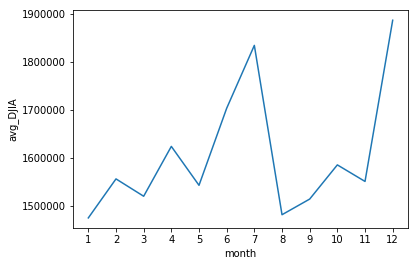

In [126]:
plt.plot(month,avg_DJIA)
plt.xlabel('month')
plt.ylabel('avg_DJIA')
plt.xticks(np.arange(1, 13, 1.0))
plt.show()  

The price has an inverse trend with the stock market.  This is very unexpected and cannot be explained.  Further exploration is required.